# Data Analytics Project: Phishing Website Classification using Machine Learning.
**Course:** Data Analystics and (Data Driven Decision)

**Objective:** Apply descriptive and predictive analytics to classify websites as legitimate, suspicious, or phishy using the UCI Website Phishing dataset.


## 1. Dataset Description
This dataset is designed for the classification task of identifying whether a given website is legitimate potentially phishing or Suspecious. It contains a total of 1,353 website instances, each characterized by 9 numerical features and a binary target variable indicating the classification `Result`.
- Format: ARFF
- 1353 instances (websites)
- 9 features + 1 target (`Result`)
- Classes:
  - `-1`: Phishing
  - `0`: Suspicious
  - `1`: Legitimate

In [1]:
import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


### 1.1 Loading and Previewing the DataSet


In [3]:
# loading the arff datafile
with open('PhishingData.arff', 'r') as f:
    dataset = arff.load(f)

# converting the dataset to dataframe
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# preview the first 5 rows
display(df.head())

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


### 1.2 checking the shape of the dataset

In [5]:
# checking the shape of the dataset
display("Dataset shape", df.shape)

'Dataset shape'

(1353, 10)

In [6]:
#column names and datatypes
print("\nColumn data type:")
print(df.dtypes)


Column data type:
SFH                  object
popUpWidnow          object
SSLfinal_State       object
Request_URL          object
URL_of_Anchor        object
web_traffic          object
URL_Length           object
age_of_domain        object
having_IP_Address    object
Result               object
dtype: object


In [7]:
#summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353
unique,3,3,3,3,3,3,3,2,2,3
top,1,0,1,-1,-1,0,0,1,0,-1
freq,767,639,751,617,610,473,563,825,1198,702


In [8]:
#checking class distribution in the target variable
print("\nTarget class distribution:")
print(df['Result']. value_counts())


Target class distribution:
Result
-1    702
1     548
0     103
Name: count, dtype: int64


### 1.3 Dataset Summary
- Shape: `1353 rows` x `10 coulmns`
- Target columns: (`Result`)
- Unique target values: `-1`, `0`, `1`.

This means that the dataset is likely Multi-class classification, where:
- `-1` = Phishy (or malicious)
- `0 `= Suspicious or neutral
- `1 `= Legitimate.


## 2 Data cleaing 
Checking for missing values, Duplicates or any data type issues

In [11]:
#checking for missing values
print("Missing values per column")
print(df.isnull().sum())

Missing values per column
SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64


In [12]:
#checking for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 629


### 2.1 Data cleaning summary
- `No missing values`: There is no need to fill or drop rows due to missing data.
- `629 duplicate rows`: That is approximately 46% of the dataset!
  
We decided to keep duplicates becasue:
- Each row is a valid, independent observation, even if values match.
- The dataset behavior-based phishing indicators, it’s possible that,Some websites exhibit identical behavior and hence should not be dropped.



In [14]:
#Keep the Original Dataset shape
print ("We keep the Original shape of the Dataset:", df.shape)

We keep the Original shape of the Dataset: (1353, 10)


## 3  Exploratory Data Analysis (EDA)
- Understanding the data visually and statistically, Identify trends. patterns, and feature relationships. Get insights into the Result class distribution.


### 3.1 Basic analysis

In [17]:
# Ensuring that all the values are numeric
df = df.apply(pd.to_numeric)

#getting baic statistic for all features
basic_stats =df.describe()
display(basic_stats)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.2 standard deviation analysis

In [19]:
print("Standard deviation per feature:\n")
print(df.std())

Standard deviation per feature:

SFH                  0.916389
popUpWidnow          0.679072
SSLfinal_State       0.822193
Request_URL          0.799682
URL_of_Anchor        0.936262
web_traffic          0.806776
URL_Length           0.762552
age_of_domain        0.975970
having_IP_Address    0.318608
Result               0.954773
dtype: float64


### Basic Statistical Analysis

We performed basic statistical analysis using `df.describe()`. This provided insights into the distribution of each feature including mean, min, max, and standard deviatio##
## Standard Deviation Analysis

The standard deviation tells us how much the values for each feature vary from the mean. A higher standard deviation indicates greater variability across websites, while a lower standard deviation suggests uniform behavior for that feature.


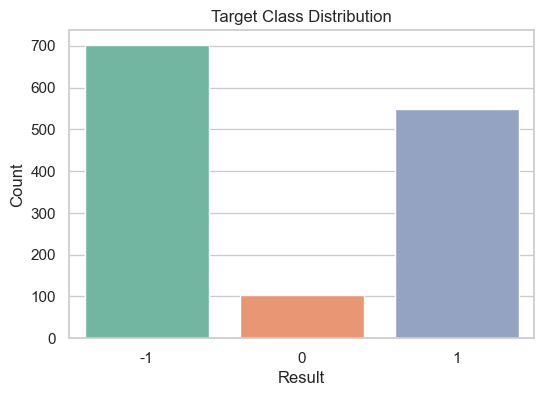

In [21]:
#set seaborn style
# Set Seaborn style
sns.set(style='whitegrid')

# 1. Target class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Result', data=df, palette='Set2')
plt.title('Target Class Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

### 3.1 class distribution Analysis
- `-1 = Phishing` with  `700 count` is the `Majority class`. 
- `1 = Legitimate` with `550  count` is the `Close Second`.
- `0 = Suspicious` with `100 count` is the `Minor Class(rare cases)`.

This is slightly `imbalanced dataset` , especially for class `0`.

### 3.4 Correlation Matrix
Most features are weakly correlated, meaning they provide independent information, which is useful for machine learning models

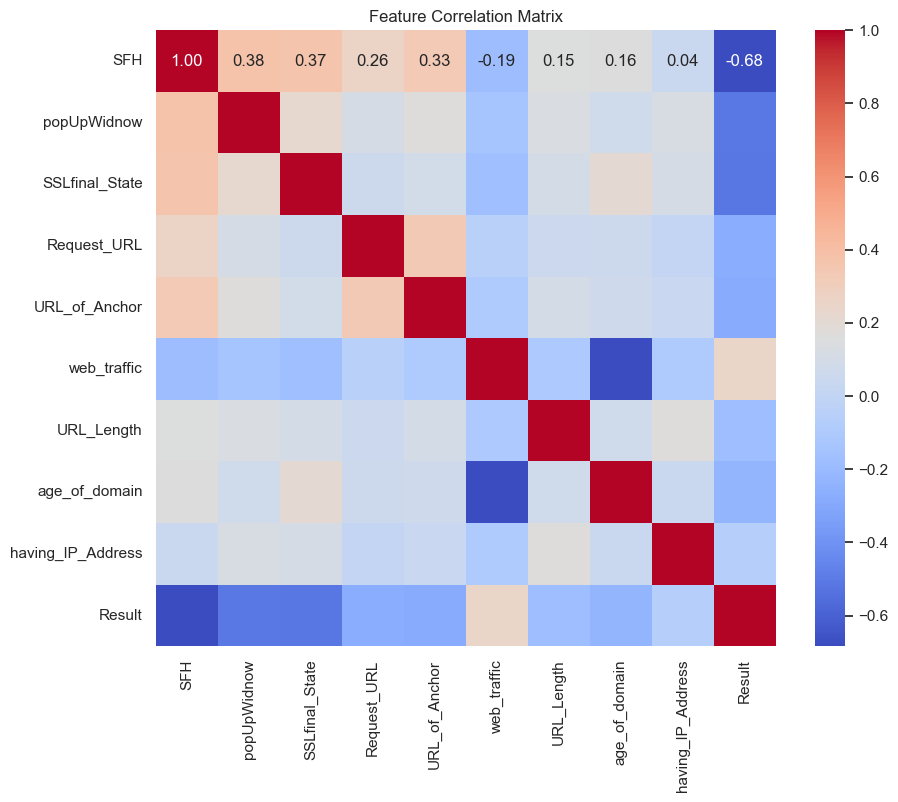

In [33]:
# 2. Heatmap to visualize correlation between features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

### 3.5 PCA
In the case of our `Dataset`, `PCA` is best use for visualization only, not as a requirement before modelling, because the features are already informative and interpretable.
The features like( `SFH`, `SSLfinal_State`, etc.) are:
- `Discrete, categorical-like values (−1, 0, 1)`
- `Already engineered by experts to reflect phishing behaviors`
These features have clear meanings and are already effective as inputs.


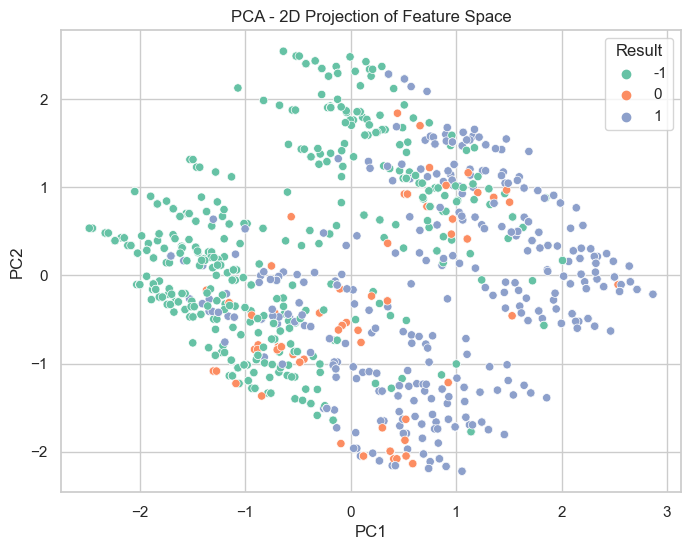

In [38]:
# Prepare data
X = df.drop('Result', axis=1)
y = df['Result']

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Result'] = y.values

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Result', palette='Set2')
plt.title("PCA - 2D Projection of Feature Space")
plt.grid(True)
plt.show()

### 3.6 scree plot

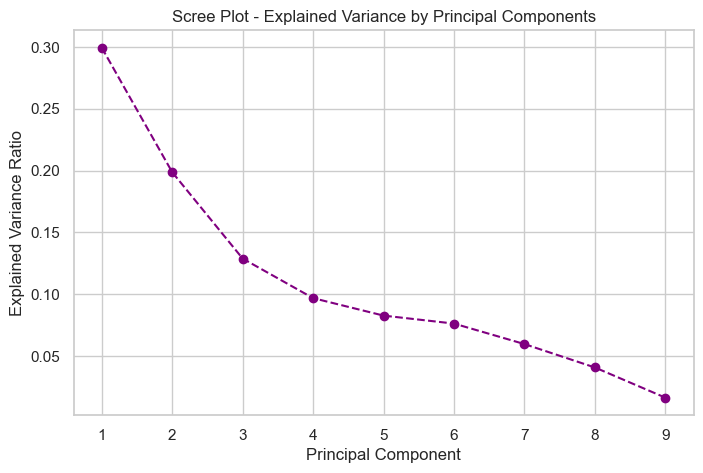

In [41]:
# Prepare feature matrix (excluding the target)
X = df.drop('Result', axis=1)

# Apply PCA without limiting the number of components
pca = PCA()
pca.fit(X)

# Plot the explained variance for each principal component
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    marker='o',
    linestyle='--',
    color='purple'
)
plt.title('Scree Plot - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, X.shape[1] + 1))
plt.grid(True)
plt.show()

## 4 Supervised ML model
Base on our dataset: We are working on a `Suppervised Learning Task`
- Data are lebeled: the `Result` column (values `-1`,`0`,`1`)
- Labels are already known in advance.
The `goal` is to use the labeled data to train a model to predict `Results` based on the feafures.

###  Main Analysis
- split the data into training and testing sets
- train a model
- evalute how well it performs.

### 4.1 Data splitting
- x = Features(everything except Results)
- y = Target (Result column)

In [47]:
# Features and Target
X = df.drop('Result', axis=1)
y = df['Result']

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42) #We use stratify=y to ensure all 3 classes are proportionally represented in both sets.

# Check the shape of the splits
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (1082, 9)
Testing set: (271, 9)


### 4.2 Training the Decision Tree

In [50]:
# Initialize and train the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

### 4.3 Evaluateing the model

In [53]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[128   3   9]
 [  4  13   4]
 [ 10   2  98]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.91      0.91       140
           0       0.72      0.62      0.67        21
           1       0.88      0.89      0.89       110

    accuracy                           0.88       271
   macro avg       0.84      0.81      0.82       271
weighted avg       0.88      0.88      0.88       271



## Try with random forest


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_clf.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Confusion Matrix:
[[126   2  12]
 [  5  12   4]
 [  8   2 100]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.90      0.90       140
           0       0.75      0.57      0.65        21
           1       0.86      0.91      0.88       110

    accuracy                           0.88       271
   macro avg       0.84      0.79      0.81       271
weighted avg       0.88      0.88      0.88       271



### Model Comparison – Decision Tree vs Random Forest

Both the Decision Tree and Random Forest classifiers achieved an overall accuracy of 88%, showing that each model is effective at detecting phishing websites. However, a deeper look at the precision, recall, and F1-scores reveals some key differences in performance.

Decision Tree:
- Slightly better recall and F1-score for the suspicious class (0).

- Strong performance across phishing (-1) and legitimate (1) classes.

Random Forest:
- Slightly higher precision on the suspicious class (0), but lower recall compared to Decision Tree.

- More stable across classes due to being an ensemble of multiple trees.

- Less prone to overfitting and generally more robust, especially on unseen data.


### SUMMARY FOR THE LEARNING MODEL

Why We Used Supervised Learning.

We chose supervised learning because our problem involved predicting known classes, i.e. phishing (-1), suspicious (0), and legitimate (1)  based on labeled historical data.

Reasons.
- The dataset includes a target variable (Result), which clearly labels each website.
- Our goal was to learn patterns from these labeled examples to predict future website behavior.
- Models like Decision Trees and Random Forests are well-suited for this kind of task.

Why we did not used Unsupervised Learning.
- Unsupervised learning is used when there's no labeled output for example, clustering websites based on similar behaviors without knowing if they’re phishing or not.
- It’s useful for exploration, but it won’t give exact classifications like “this is a phishing site.

Final Thought:
Because we had clear labels and a well-defined classification task, supervised learning was the most appropriate and effective choice for detecting phishing websites.


# Conclusions

**Descriptive analytics**
We began by exploring the dataset using descriptive analytics. This helped us to:
- Understand the distribution of the classes (phishing `-1`, suspicious `0`, legitimate `1`)
- Analyze the most common behaviors of websites, such as the use of SSL certificates, IP addresses, form handler etc.
- Revealed class imbalanced, with more legitimate and phishy sites.
- Generate summary statistics and visualizations (e.g., bar charts, correlation heatmaps).
  
Therefore; Descriptive analytics gave us the insight we needed to understand the dataset, detect patterns, and make informed decisions about how to clean the data and what models to use. 

**Predictive analytics**

Predictive analytics enabled us to build models that could automatically classify websites.
We, therefore; applied:
- Decision Tree and Random Forest models, both achieving an accuracy of 88%. Using both the models achieved reasonable classification performance.
- Feature importance analysis, which revealed that certain website characteristics (e.g., SSL use, URL structure) are strong predictors of phishing behavior.
- Feature importance analysis highlights which website characteristics are most predictive.
- Improvements: Try more models (Logistics regression,hyperparameter tuning, SVM), hyperparameter tuning, and cross-validation.
